<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Tasks/blob/main/Task_2_double_prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def window_transform_series(series, window_size, horizon_size):
    X, y = [], []
    for i in range(len(series) - window_size - horizon_size + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size: i + window_size + horizon_size])
    X,y=np.squeeze(np.array(X)),np.squeeze(np.array(y))
    return X, y


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [ ]:
# Read in the time series data from CSV file
df = pd.read_csv('/content/df1_COMED_hourly.csv')
time_series = df['load'].values.astype('float64')

In [ ]:
# Scale the data
scaler = MinMaxScaler()
time_series = scaler.fit_transform(time_series.reshape(-1, 1))

In [ ]:
# Window the time series data
window_size = 7
horizon_size = 1
X, y = window_transform_series(time_series, window_size, horizon_size)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(window_size,)))
model.add(Dense(1, activation="relu"))

In [ ]:
# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1,validation_split=0.1)

Epoch 1/50
493/493 [==============================] - 2s 2ms/step - loss: 0.0060 - val_loss: 0.0028
Epoch 2/50
493/493 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 3/50
493/493 [==============================] - 1s 2ms/step - loss: 9.4203e-04 - val_loss: 9.3979e-04
Epoch 4/50
493/493 [==============================] - 1s 2ms/step - loss: 8.6354e-04 - val_loss: 8.8075e-04
Epoch 5/50
493/493 [==============================] - 1s 2ms/step - loss: 8.0997e-04 - val_loss: 7.9843e-04
Epoch 6/50
493/493 [==============================] - 1s 2ms/step - loss: 7.7501e-04 - val_loss: 7.8824e-04
Epoch 7/50
493/493 [==============================] - 1s 2ms/step - loss: 7.5722e-04 - val_loss: 9.1266e-04
Epoch 8/50
493/493 [==============================] - 1s 2ms/step - loss: 7.4543e-04 - val_loss: 7.4300e-04
Epoch 9/50
493/493 [==============================] - 1s 2ms/step - loss: 7.3504e-04 - val_loss: 7.4266e-04
Epoch 10/50
493/493 [=======================

In [ ]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1) #validation_split=0.1)

Epoch 1/50
548/548 [==============================] - 1s 1ms/step - loss: 7.0038e-04
Epoch 2/50
548/548 [==============================] - 1s 2ms/step - loss: 6.9858e-04
Epoch 3/50
548/548 [==============================] - 1s 2ms/step - loss: 7.0452e-04
Epoch 4/50
548/548 [==============================] - 1s 2ms/step - loss: 6.9600e-04
Epoch 5/50
548/548 [==============================] - 1s 2ms/step - loss: 6.9722e-04
Epoch 6/50
548/548 [==============================] - 1s 1ms/step - loss: 6.9319e-04
Epoch 7/50
548/548 [==============================] - 1s 1ms/step - loss: 6.9279e-04
Epoch 8/50
548/548 [==============================] - 1s 1ms/step - loss: 6.9294e-04
Epoch 9/50
548/548 [==============================] - 1s 1ms/step - loss: 7.0007e-04
Epoch 10/50
548/548 [==============================] - 1s 1ms/step - loss: 6.9476e-04
Epoch 11/50
548/548 [==============================] - 1s 1ms/step - loss: 6.8991e-04
Epoch 12/50
548/548 [==============================] - 1s 1ms/s

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)

274/274 [==============================] - 0s 1ms/step


In [ ]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.026089326824270245


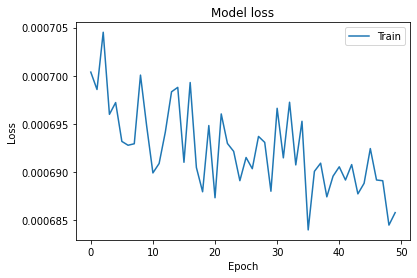

In [ ]:
# Plot the training, validation and test loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Test loss: 0.0006806531455367804


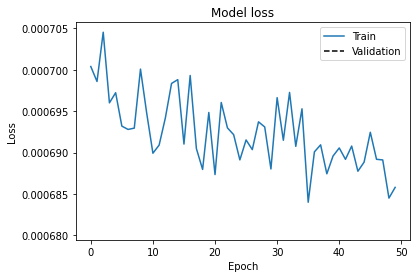

In [ ]:
# Evaluate the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)

# Plot the training, validation and test loss
plt.plot(history.history['loss'])
plt.plot(test_loss, '--', c='black')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')
plt.show()
